In [ ]:
import pandas as pd
file_path = "/content/CAR DETAILS FROM CAR DEKHO.csv"
data = pd.read_csv(file_path)
print(data.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [ ]:
import pandas as pd
import numpy as np
file_path = "/content/CAR DETAILS FROM CAR DEKHO.csv"
data = pd.read_csv(file_path)
print(data.info())
data = data.dropna()
data['year'] = data['year'].astype(int)
data['km_driven'] = data['km_driven'].astype(str).str.replace(",", "").astype(int)
data['fuel'] = data['fuel'].astype("category").cat.codes
data['seller_type'] = data['seller_type'].astype("category").cat.codes
data['transmission'] = data['transmission'].astype("category").cat.codes
data['owner'] = data['owner'].astype("category").cat.codes
data = data.drop(columns=['name'])
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
   year  selling_price  km_driven  fuel  seller_type  transmission  owner
0  2007          60000      70000     4            1             1      0
1  2007         135000      50000     4            1             1      0
2  2012         600000     100000     1            1             1      0
3  2017         250000      46000     4            1             1      0
4  2014         450000     141000    

In [ ]:
import pandas as pd
import numpy as np
file_path = "/content/CAR DETAILS FROM CAR DEKHO.csv"
data = pd.read_csv(file_path)
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())
data['year'] = data['year'].astype(int)
data['km_driven'] = data['km_driven'].astype(str).str.replace(',', '').astype(int)
data = data.rename(columns={"transmission": "transmission_type"})
data['fuel'] = data['fuel'].astype('category').cat.codes
data['seller_type'] = data['seller_type'].astype('category').cat.codes
data['transmission_type'] = data['transmission_type'].astype('category').cat.codes
data['owner'] = data['owner'].astype('category').cat.codes
data = data.drop(columns=['name'])
print("\nCleaned Dataset Info:")
print(data.info())
print("\nDescriptive Statistics of Cleaned Data:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None

First 5 Rows of the Dataset:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Ho

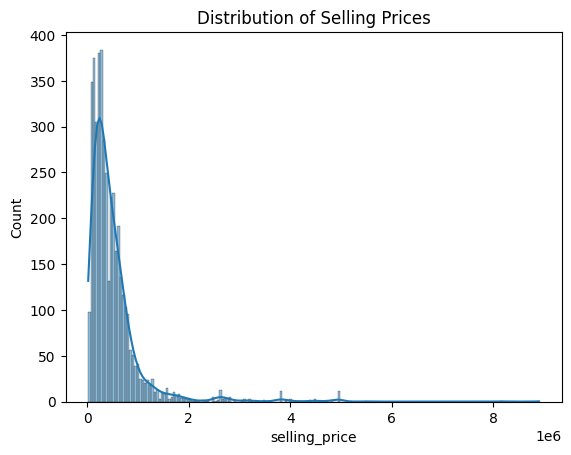

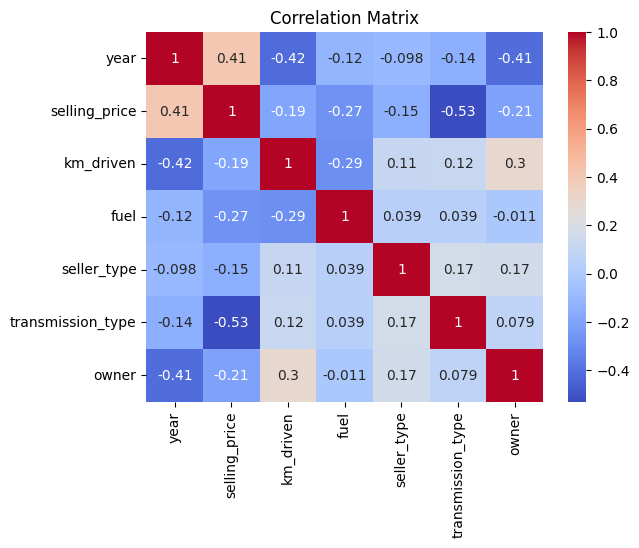

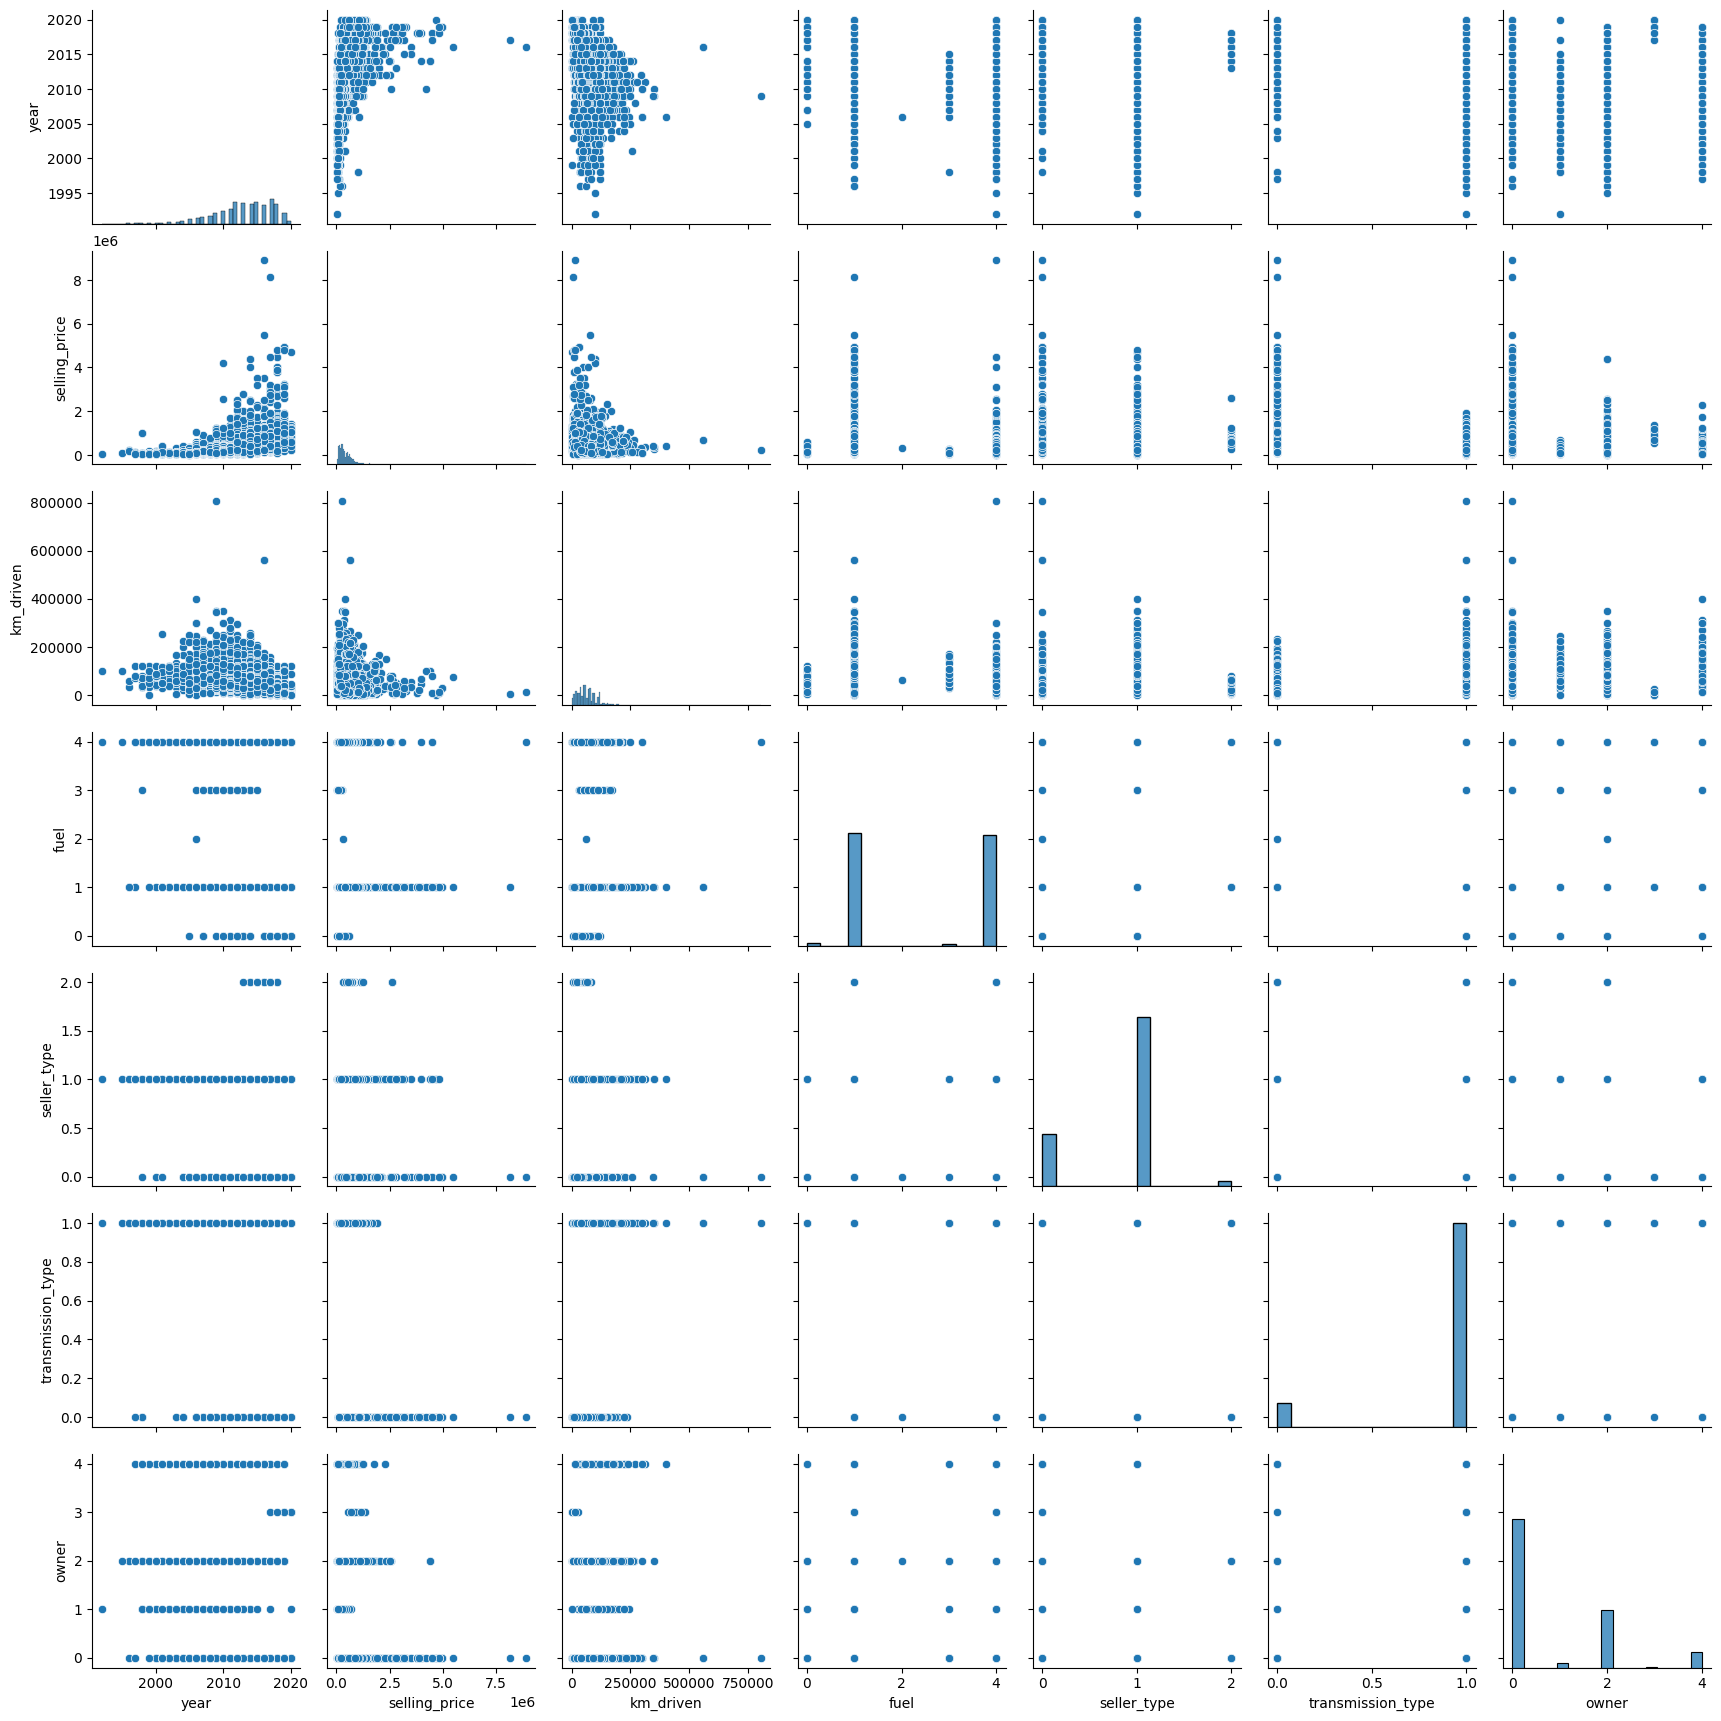

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['selling_price'], kde=True)
plt.title("Distribution of Selling Prices")
plt.show()
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
sns.pairplot(data)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = data.drop(columns=['selling_price'])
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  R2 Score: {r2_score(y_test, y_pred)}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
    print("-" * 30)


Linear Regression:
  R2 Score: 0.3939008529340017
  MSE: 184963450105.73505
  MAE: 222188.94261516692
------------------------------
Decision Tree:
  R2 Score: 0.3614475228025418
  MSE: 194867242146.34915
  MAE: 181041.7785619942
------------------------------
Random Forest:
  R2 Score: 0.4984431680396646
  MSE: 153060241896.9983
  MAE: 169105.84811620106
------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
    }
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best R2 Score: 0.6301356713508779


In [ ]:
pip install streamlit


In [ ]:
import joblib
joblib.dump(model, "car_price_model.pkl")



['car_price_model.pkl']

In [ ]:
import streamlit as st
import numpy as np
import joblib
model = joblib.load("car_price_model.pkl")
st.title("Car Price Prediction App")
st.write("Predict the price of a used car based on various features.")
year = st.number_input("Year of Purchase", min_value=2000, max_value=2023, step=1)
km_driven = st.number_input("Kilometers Driven", min_value=0)
fuel = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG", "LPG", "Electric"])
seller_type = st.selectbox("Seller Type", ["Individual", "Dealer", "Trustmark Dealer"])
transmission = st.selectbox("Transmission Type", ["Manual", "Automatic"])
owner = st.selectbox("Owner Type", ["First Owner", "Second Owner", "Third Owner", "Fourth & Above", "Test Drive Car"])
fuel_mapping = {"Petrol": 0, "Diesel": 1, "CNG": 2, "LPG": 3, "Electric": 4}
seller_type_mapping = {"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2}
transmission_mapping = {"Manual": 0, "Automatic": 1}
owner_mapping = {
    "First Owner": 0, "Second Owner": 1, "Third Owner": 2,
    "Fourth & Above": 3, "Test Drive Car": 4
}
features = np.array([
    year, km_driven, fuel_mapping[fuel], seller_type_mapping[seller_type],
    transmission_mapping[transmission], owner_mapping[owner]
]).reshape(1, -1)
if st.button("Predict Price"):
    try:
        price = model.predict(features)
        st.success(f"Predicted Price: ₹ {price[0]:,.2f}")
    except Exception as e:
        st.error(f"An error occurred: {e}")



2024-12-01 13:45:41.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 13:45:41.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar